In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

In [2]:
import datetime
import matplotlib.pyplot as plt
import os
import cdflib
from glob import glob
import numpy as np
from os.path import basename
import mpl_utils as mvp
import matplotlib.dates as mdates
from textwrap impot

# Solar Orbiter 8 Data Workshop Data Analaysis Tutorial for MAG

This Data Analysis Tutorial for MAG will guide you though getting hold of MAG data from the ESA Solar Orbiter Archive (SOAR) and using that data. We will describe the different types of MAG data products that are available on the SOAR, and what data each of the products contain. We will also provide several examples of how you can use MAG data products.

## Types of MAG data products

- `solo_L2_mag-gse-burst`
- `solo_L2_mag-gse-normal`
- `solo_L2_mag-gse-normal-1-minute`
- `solo_L2_mag-rtn-burst`
- `solo_L2_mag-rtn-ll`
- `solo_L2_mag-rtn-ll-1-minute`
- `solo_L2_mag-rtn-normal`
- `solo_L2_mag-rtn-normal-1-minute`
- `solo_L2_mag-srf-burst`
- `solo_L2_mag-srf-ll`
- `solo_L2_mag-srf-normal`
- `solo_L2_mag-vso-normal`
- `solo_L2_mag-vso-normal-1-minute`

## Download MAG data products

In [2]:
%%sh
mkdir -p data
wget -O 'data/solo_L2_mag-rtn-normal_20220228.cdf' 'http://soar.esac.esa.int/soar-sl-tap/data?retrieval_type=LAST_PRODUCT&data_item_id=solo_L2_mag-rtn-normal_20220228&product_type=SCIENCE'

--2022-08-17 13:35:23--  http://soar.esac.esa.int/soar-sl-tap/data?retrieval_type=LAST_PRODUCT&data_item_id=solo_L2_mag-rtn-normal_20220228&product_type=SCIENCE
Resolving soar.esac.esa.int (soar.esac.esa.int)... 193.147.153.149, 131.176.243.100, 192.171.1.145, ...
Connecting to soar.esac.esa.int (soar.esac.esa.int)|193.147.153.149|:80... connected.
HTTP request sent, awaiting response... 200 
Length: 10835625 (10M) [application/octet-stream]
Saving to: ‘data/solo_L2_mag-rtn-normal_20220228.cdf’

     0K .......... .......... .......... .......... ..........  0%  637K 17s
    50K .......... .......... .......... .......... ..........  0%  631K 17s
   100K .......... .......... .......... .......... ..........  1%  585K 17s
   150K .......... .......... .......... .......... ..........  1% 1.14M 15s
   200K .......... .......... .......... .......... ..........  2% 1.25M 13s
   250K .......... .......... .......... .......... ..........  2% 4.47M 12s
   300K .......... .......... .......

In [3]:
%%sh
mkdir -p data
wget -O 'data/solo_L2_mag-rtn-normal_20211127.cdf' 'http://soar.esac.esa.int/soar-sl-tap/data?retrieval_type=LAST_PRODUCT&data_item_id=solo_L2_mag-rtn-normal_20211127&product_type=SCIENCE'

--2022-08-17 13:37:53--  http://soar.esac.esa.int/soar-sl-tap/data?retrieval_type=LAST_PRODUCT&data_item_id=solo_L2_mag-rtn-normal_20211127&product_type=SCIENCE
Resolving soar.esac.esa.int (soar.esac.esa.int)... 193.147.153.149, 131.176.243.100, 192.171.1.145, ...
Connecting to soar.esac.esa.int (soar.esac.esa.int)|193.147.153.149|:80... connected.
HTTP request sent, awaiting response... 200 
Length: 10686693 (10M) [application/octet-stream]
Saving to: ‘data/solo_L2_mag-rtn-normal_20211127.cdf’

     0K .......... .......... .......... .......... ..........  0% 1.24M 8s
    50K .......... .......... .......... .......... ..........  0% 1.23M 8s
   100K .......... .......... .......... .......... ..........  1% 1.44M 8s
   150K .......... .......... .......... .......... ..........  1% 7.65M 6s
   200K .......... .......... .......... .......... ..........  2% 1.42M 6s
   250K .......... .......... .......... .......... ..........  2% 7.91M 5s
   300K .......... .......... .......... ..

## Loading MAG data

In [16]:
normal_path = 'data/solo_L2_mag-rtn-normal_20211127.cdf'

In [67]:
# Open normal mode data file for reading
with cdflib.cdfread.CDF(normal_path) as normal_file:

    # Extract epoch times
    normal_epoch = normal_file.varget(variable='EPOCH', expand=False, to_np=True)

    # Extract epoch times
    CDF_epoch_class = cdflib.epochs.CDFepoch()
    normal_time = CDF_epoch_class.to_datetime(normal_epoch, to_np=True)

    # Extract B vectors times
    normal_B = normal_file.varget(variable='B_RTN', expand=False)
    normal_norm = np.linalg.norm(normal_B, axis=1)

    # Get data attributes
    normal_attributes = normal_file.globalattsget(expand=True)

## Inspecting MAG metadata

In [70]:
normal_attributes['Acknowledgement']

{0: ['Solar Orbiter magnetometer data was provided by Imperial College Londonand supported by the UK Space Agency',
  'CDF_UCHAR']}

## Plotting MAG magnetic field data

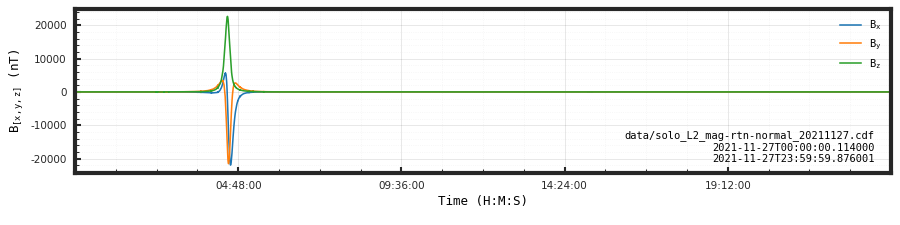

In [49]:
fig, ax = plt.subplots()
fig.set_dpi(75)
fig.set_size_inches(12, 3)
mvp.subplots_adjust_inches(fig,  left=1.0, bottom=0.7, right=0.12, top=0.12)
mvp.use_grid_style(ax)

ax.plot(normal_time, normal_B.T[0], label='$\mathregular{B_x}$')
ax.plot(normal_time, normal_B.T[1], label='$\mathregular{B_y}$')
ax.plot(normal_time, normal_B.T[2], label='$\mathregular{B_z}$')

ax.set_xlim(normal_time[0], normal_time[-1])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.legend(loc='upper right', frameon=False, prop={'family': 'monospace', 'size': 10})
ax.text(
    0.98, 0.05,
    f'{normal_path}\n{normal_time[0].item().isoformat()}\n{normal_time[-1].item().isoformat()}',
    transform=ax.transAxes,
    ha="right", va="bottom", fontsize=10, fontfamily='monospace')
ax.set_xlabel('Time (H:M:S)', fontsize=12, fontfamily='monospace')
ax.set_ylabel('$\mathregular{B_{[x,y,z]}}$ (nT)', fontsize=12, fontfamily='monospace')

plt.show()
plt.close(fig)

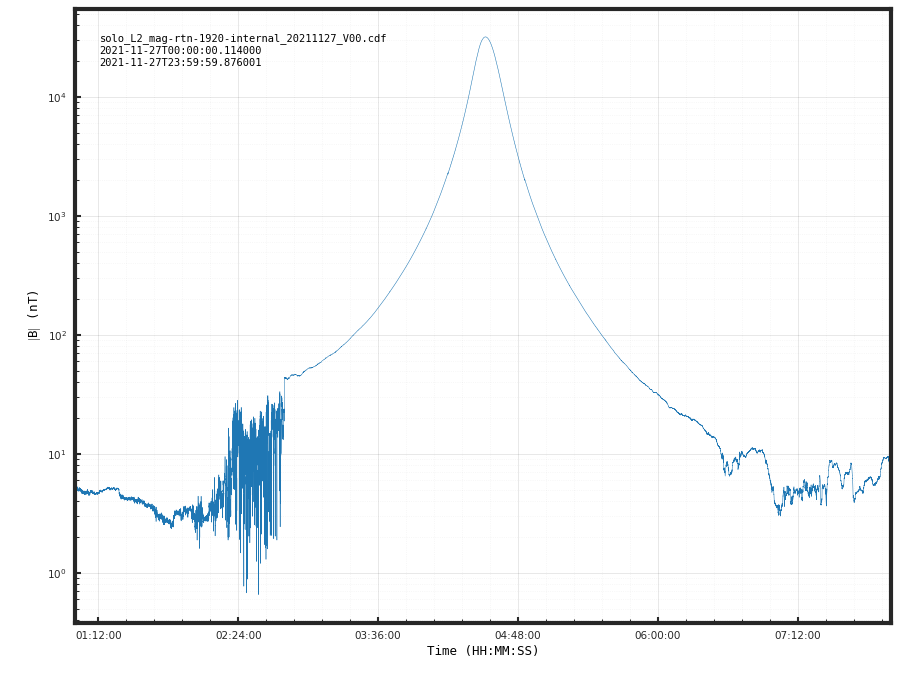

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
fig.set_dpi(75)
mvp.subplots_adjust_inches(fig,  left=1.0, bottom=0.7, right=0.12, top=0.12)
mvp.use_grid_style(ax)

time_start = datetime.datetime.fromisoformat('2021-11-27T01:00:00')
time_stop = datetime.datetime.fromisoformat('2021-11-27T08:00:00')
mask = (normal_time > time_start) * (normal_time < time_stop)

ax.semilogy(normal_time[mask], normal_norm[mask], lw=0.5)
ax.set_xlim(normal_time[mask][0], normal_time[mask][-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.text(
    0.03, 0.96,
    f'solo_L2_mag-rtn-1920-internal_20211127_V00.cdf\n{normal_time[0].item().isoformat()}\n{normal_time[-1].item().isoformat()}',
    transform=ax.transAxes,
    ha="left", va="top", fontsize=10, fontfamily='monospace')
ax.set_xlabel('Time (HH:MM:SS)', fontsize=12, fontfamily='monospace')
ax.set_ylabel('$|\mathregular{B}|$ (nT)', fontsize=12, fontfamily='monospace')

plt.show()
plt.close(fig)

## References

- https://github.com/SolarOrbiterWorkshop/solo8_tutorials
- https://blogs.qub.ac.uk/so8belfast/data-analysis-workshop-16-september-2022-2/